# Objective 

* run a simplisitic energyplus model from the command line

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import subprocess

In [28]:
from src.variables import energyplus_install_dir
from src.parsing import parse_energyplus_datetime_string

In [21]:
idf_file_relative = Path("example0/1ZoneUncontrolled.idf")
weather_file_realtive = Path("./weatherfiles/USA_IL_Chicago-OHare.Intl.AP.725300_TMY3.epw")
output_relative_directory='./example0/sim'

In [24]:
# for mac f"{energyplus_install_dir}/energyplus --help"
# for windows f'"{energyplus_install_dir}\\EnergyPlus"

# readvars - included to create a .csv file of the results
cl_st=(f"""{energyplus_install_dir}/energyplus
       --readvars   
       --output-directory {output_relative_directory}
       --weather {weather_file_realtive}
       {idf_file_relative}"""
      )

# a slightly modified run command
result = subprocess.run([f"{energyplus_install_dir}/energyplus", "--readvars",
                         "--output-directory", f"{output_relative_directory}",
                         "--weather", f"{weather_file_realtive}",
                         f"{idf_file_relative}"
                        ],
                        capture_output=True
                       )


In [25]:
print('---ARGS---\n',result.args)
print('---RETURNCODE---\n',result.returncode, '(SUCCESS)' if result.returncode==0 else '(FAIL)')
print('---STDOUT---\n',result.stdout.decode())
print('---STDERR---\n',result.stderr.decode())

---ARGS---
 ['/Applications/EnergyPlus-22-1-0/energyplus', '--readvars', '--output-directory', './example0/sim', '--weather', 'weatherfiles/USA_IL_Chicago-OHare.Intl.AP.725300_TMY3.epw', 'example0/1ZoneUncontrolled.idf']
---RETURNCODE---
 0 (SUCCESS)
---STDOUT---
 EnergyPlus Starting
EnergyPlus, Version 22.1.0-ed759b17ee, YMD=2022.06.09 21:20
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Warming up {7}
Warming up {8}
Warming up {9}
Warming up {10}
Warming up {11}
Warming up {12}
Warming up {13}
Warming up {14}
Warming up {15}
Warming up {16}
Warming up {17}
Warming up {18}
Warming up {19}
Warming up {20}
Warming up {21}
Warming up {22}
Starting Simulation at 12/21 for DENVER CENTENNIAL  GOLDEN   N ANN HTG 99% CONDNS DB
Initializing New Environment Parameters
Warm

## Look at the results

Text(0, 0.5, 'Air temperature (${^o}C$)')

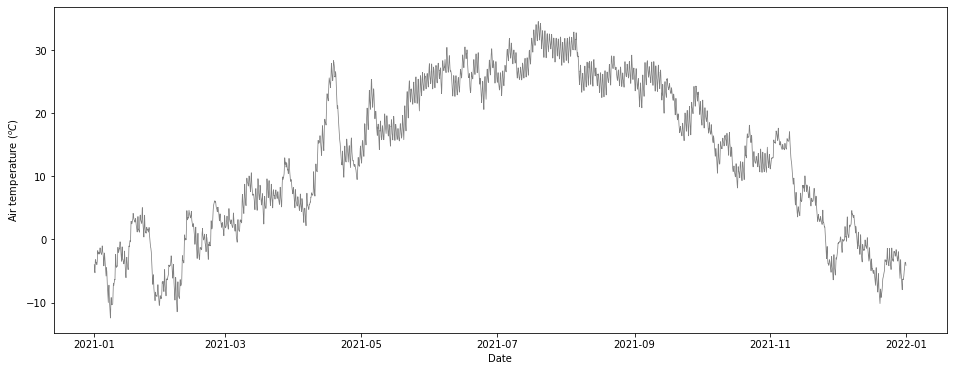

In [29]:
df=pd.read_csv("example0/sim/eplusout.csv", 
               parse_dates=[0],
               index_col=[0],
               date_parser=parse_energyplus_datetime_string 
              )

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df['ZONE ONE:Zone Mean Air Temperature [C](Hourly)'][48:],  
        color='grey',
        linewidth=0.75
       )
ax.set_xlabel('Date')
ax.set_ylabel('Air temperature (${^o}C$)')  